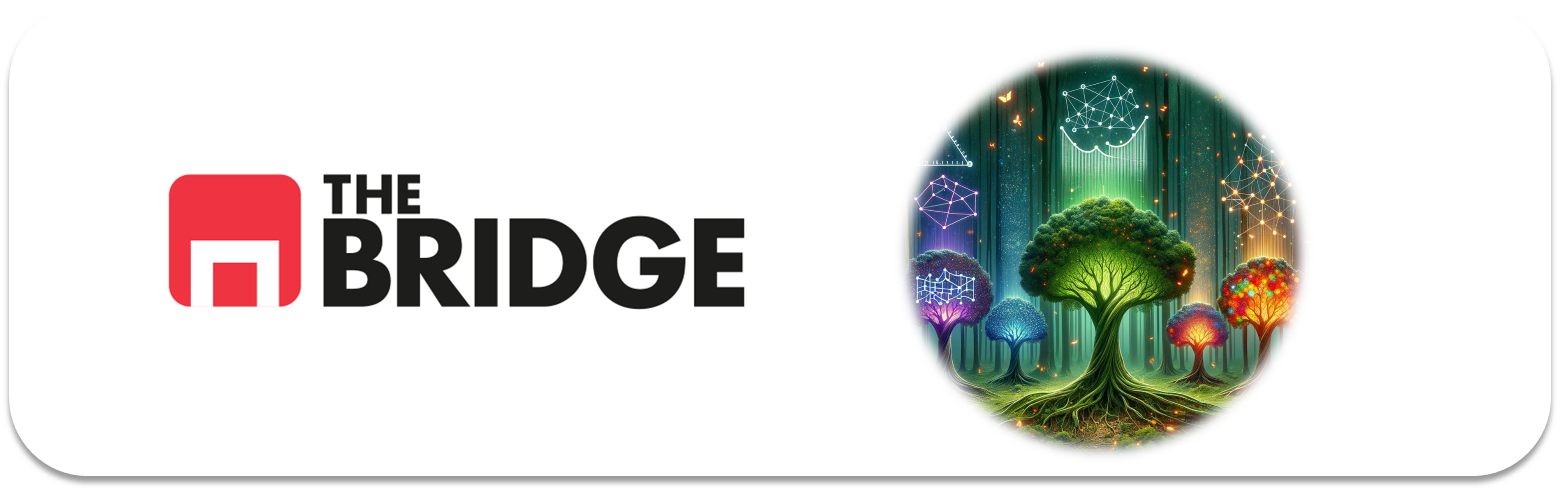

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

# Pasos a seguir

### 1. Leer el dataframe

In [ ]:
df = pd.read_csv(url, header = None, names= names) 

# Visualización general
print("Forma del dataset:", df.shape)
df.head()

# class = y

Forma del dataset: (768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Estudio de variables, nulos, etc. 

In [ ]:
# Primer vistazo
df.info()
df.describe()

# Aparentemente, no tenemos ningún nulo y todas las columnas son numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
(df == 0).sum()

# Aunque no hay NaN, algunas columnas tienen valores 0 que pueden representar datos ausentes en contextos médicos (ej. glucosa, insulina, etc.)

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

3. División del target y features y train test split

In [8]:
# Target
y = df["class"]

y.value_counts(normalize=True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [10]:
# Features
X = df.drop(columns= ["class"])

features = X.columns.tolist()
print("Features:", features)

Features: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=42)

# Comprobación
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (614, 8)
Test shape: (154, 8)


### 4. Mini EDA

Proporción de clases: 
 class
0    0.653094
1    0.346906
Name: proportion, dtype: float64


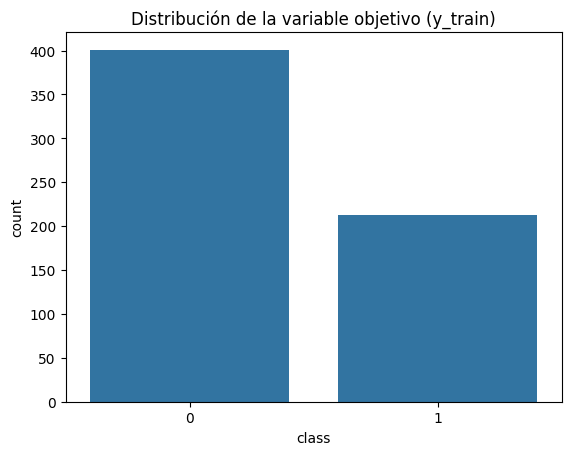

In [17]:
# Unión de X_train e y_train para facilitar el análisis conjunto
df_train = X_train.copy()
df_train["class"] = y_train

# Visualización de la distribución del target
sns.countplot(x = "class", data = df_train)
plt.title("Distribución de la variable objetivo (y_train)")
plt.show

# Proporciones
print("Proporción de clases: \n", y_train.value_counts(normalize=True))

In [ ]:
# Variables numéricas clave que podrían tener ceros no válidos
cols_con_ceros_sospechosos = ["plas", "pres", "skin", "test", "mass"]

# cuántos ceros hay en cada una de esas columnas
print("Valores cero por variable (en X_train):")
print((X_train[cols_con_ceros_sospechosos] == 0).sum())

# Skin y test tienen muchos 0s

Valores cero por variable (en X_train):
plas      5
pres     24
skin    176
test    290
mass      7
dtype: int64


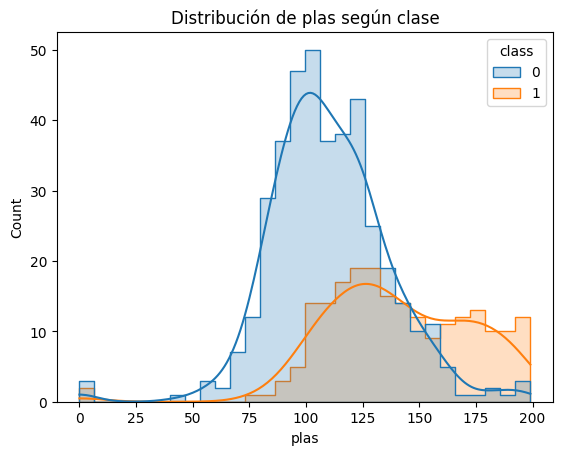

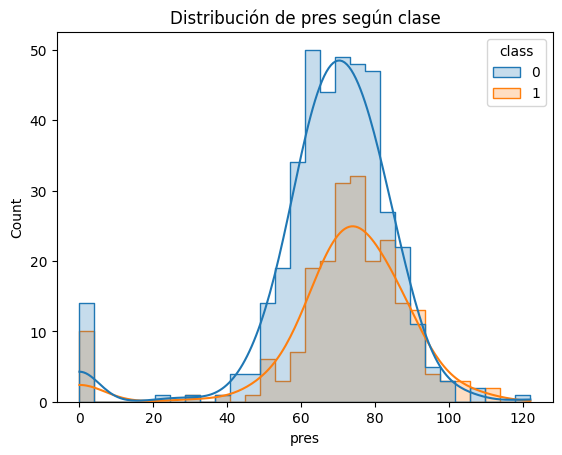

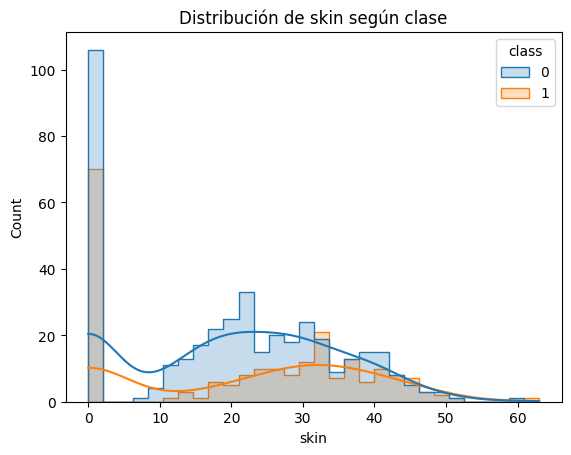

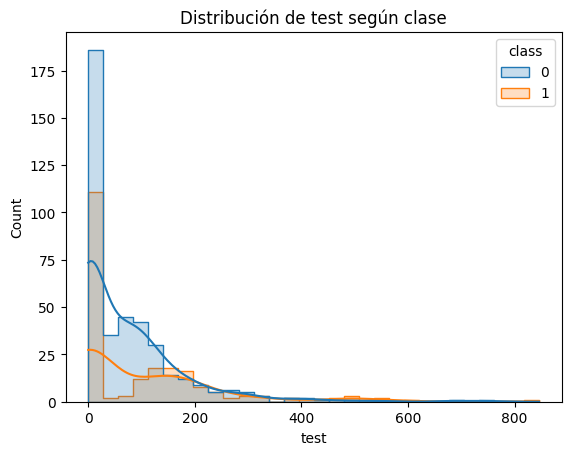

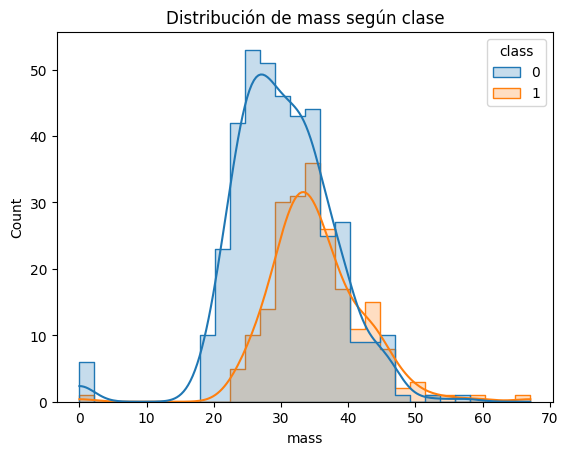

In [ ]:
# Histograma de las variables con posibles ceros anómalos
for col in cols_con_ceros_sospechosos:
    sns.histplot(data=df_train, x=col, hue="class", bins=30, kde=True, element="step")
    plt.title(f"Distribución de {col} según clase")
    plt.show()

In [25]:
# Columnas sin ceros sospechosos
cols_no_sospechosos = [col for col in X_train.columns if col not in cols_con_ceros_sospechosos]
print(cols_no_sospechosos)

['preg', 'pedi', 'age']


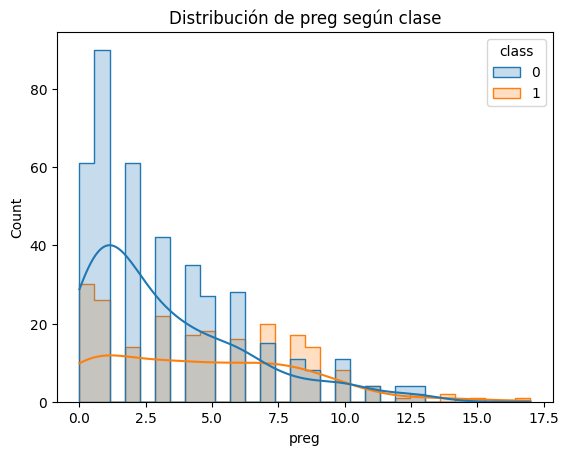

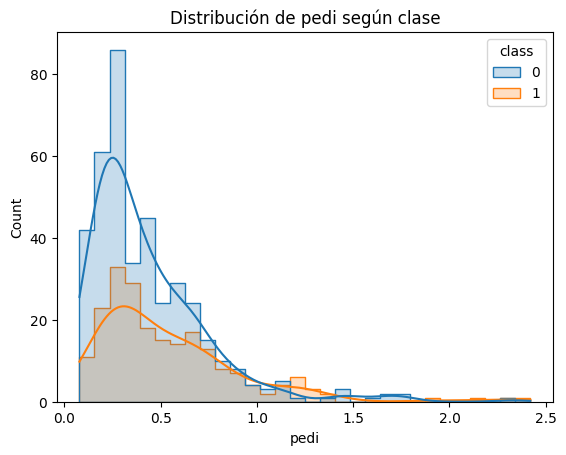

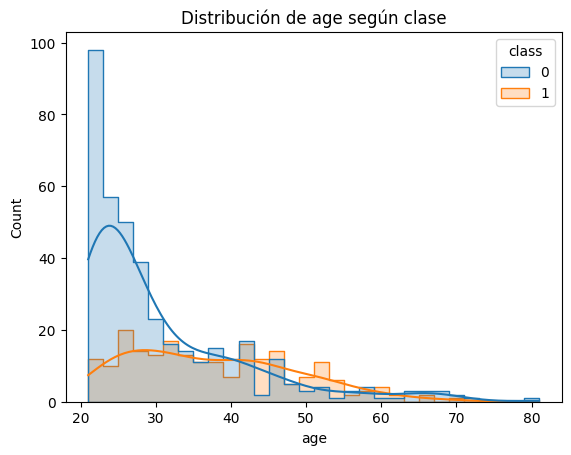

In [26]:
# Histograma de las variables con posibles ceros anómalos
for col in cols_no_sospechosos:
    sns.histplot(data=df_train, x=col, hue="class", bins=30, kde=True, element="step")
    plt.title(f"Distribución de {col} según clase")
    plt.show()

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

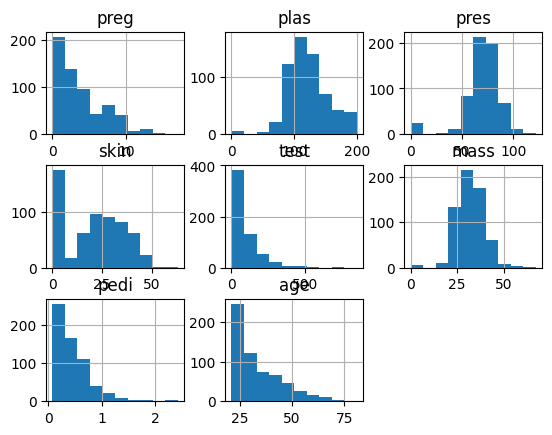

In [30]:
X_train.hist()

Se toma la decisión de eliminar `test` y `skin` por:

- Proporción extrema de ceros

- Dificultad para imputar sin sesgo

- Bajo poder discriminativo observado

- Redundancia contextual con otras variables mejores

In [31]:
# Features elegidas en train y test 
X_train = X_train.drop(columns=["test", "skin"])
X_test = X_test.drop(columns=["test", "skin"])

### 5. Tratamiento de features

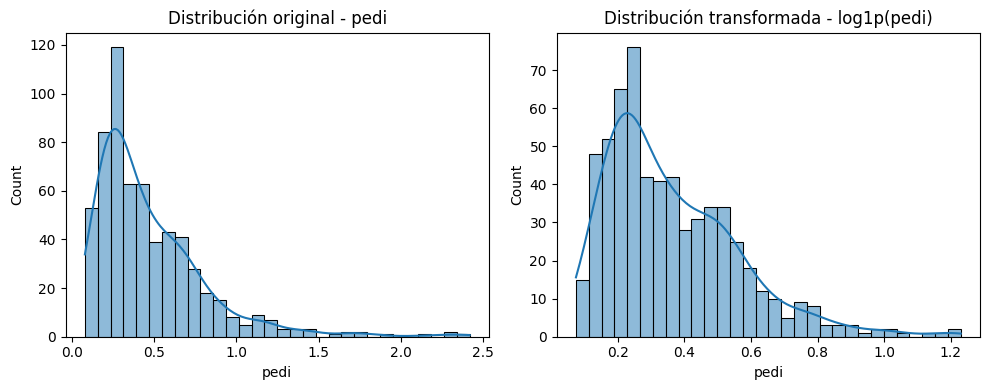

In [32]:
# Aplicación de Log1p a age y pedi para intentar normalizar su distribución 
pedi_log = np.log1p(X_train["pedi"])
age_log = np.log1p(X_train["age"])

# Comparación pedi vs pedi_log
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(X_train["pedi"], bins=30, kde=True)
plt.title("Distribución original - pedi")

plt.subplot(1,2,2)
sns.histplot(pedi_log, bins=30, kde=True)
plt.title("Distribución transformada - log1p(pedi)")

plt.tight_layout()
plt.show()

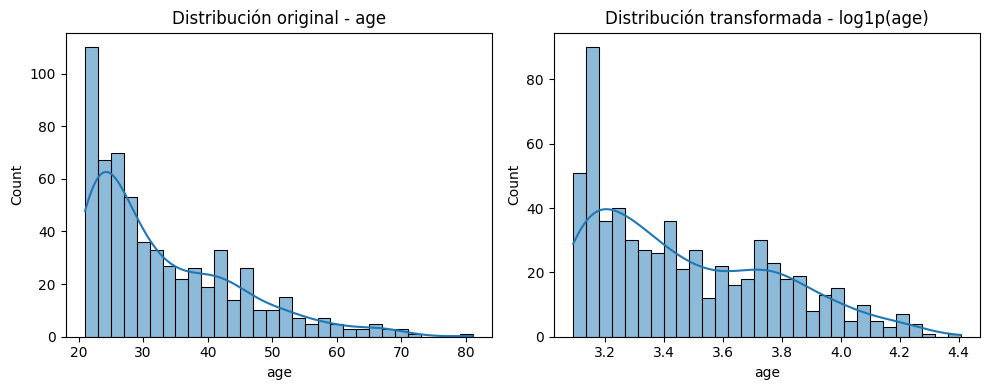

In [33]:
# Comparación age vs age_log
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(X_train["age"], bins=30, kde=True)
plt.title("Distribución original - age")

plt.subplot(1,2,2)
sns.histplot(age_log, bins=30, kde=True)
plt.title("Distribución transformada - log1p(age)")

plt.tight_layout()
plt.show()

In [ ]:
# La mejora parece mínima pero como se va hacer el modelo base de regresión logística se mantienen
X_train["pedi_log"] = pedi_log
X_train["age_log"] = age_log

X_test["pedi_log"] = np.log1p(X_test["pedi"])
X_test["age_log"] = np.log1p(X_test["age"])

# Sustitución en train y test
X_train.drop(columns=["pedi", "age"], inplace=True)
X_test.drop(columns=["pedi", "age"], inplace=True)


In [35]:
# Como vamos a hacer primero un modelo base -> Modelo de regresión logística: es necesario escalar las variables.
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_scaled.describe()

,preg,plas,pres,mass,pedi,age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,1.735854e-17,-2.169817e-17,6.943414e-17,-5.699386e-16,1.562268e-16,-3.761016e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.130523e+00,-3.775663e+00,-3.752683e+00,-4.135256e+00,-1.162210e+00,-1.035940e+00
25%,-8.284601e-01,-6.515379e-01,-2.927587e-01,-6.313921e-01,-6.764304e-01,-7.749361e-01
50%,-2.243336e-01,-1.204366e-01,1.397318e-01,2.147879e-03,-2.872124e-01,-3.399290e-01
75%,6.818561e-01,5.668710e-01,5.722222e-01,5.678085e-01,4.295726e-01,6.170866e-01
max,4.004552e+00,2.441346e+00,2.842797e+00,4.540363e+00,5.796175e+00,4.184145e+00


### 6. Modelado
#### Regresión logística

In [39]:
# Modelo base
logreg = LogisticRegression(max_iter= 1000, random_state= 42)

# Entrenamiento
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = logreg.predict(X_test_scaled)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, digits=3))


Accuracy: 0.7597402597402597

Matriz de confusión:
[[80 19]
 [18 37]]

Informe de clasificación:
              precision    recall  f1-score   support

           0      0.816     0.808     0.812        99
           1      0.661     0.673     0.667        55

    accuracy                          0.760       154
   macro avg      0.739     0.740     0.739       154
weighted avg      0.761     0.760     0.760       154



- Verdaderos positivos (VP): 37 pacientes con diabetes correctamente clasificados

- Falsos negativos (FN): 18 pacientes con diabetes no detectados 

- Verdaderos negativos (VN): 80 sanos correctamente clasificados

- Falsos positivos (FP): 19 sanos clasificados erróneamente como enfermos

Se trata de un modelo simple, rápido y con resultados aceptables como punto de partida. Sin embargo, pierde más de 1 de cada 3 pacientes con diabetes, lo cual puede no ser aceptable en un caso clínico real.

Este modelo servirá como línea base para comparar con modelos de tipo Bagging (Random Forest) y Boosting (GradientBoosting, XGBoost…).

#### Ensemble

In [44]:
# Modelos de bagging y boosting
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)

model_names = ["Random Forest", "Gradient Boosting", "XGBoost"]
model_set = [rf, gb, xgb]

In [ ]:
# Comparación con validación cruzada (pre-optimización)
metricas_cv = {}
valores = []

In [ ]:
for nombre, modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv=5, scoring="accuracy")
    valores.append(np.mean(metricas_cv[nombre]))

ganador = list(metricas_cv.keys())[np.argmax(valores)]


RandomForestClassifier(random_state=42)
GradientBoostingClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [50]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

El ganador es Gradient Boosting


### 7. Optimización del ganador

In [51]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (CV):", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor score (CV): 0.7818072770891644


              precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



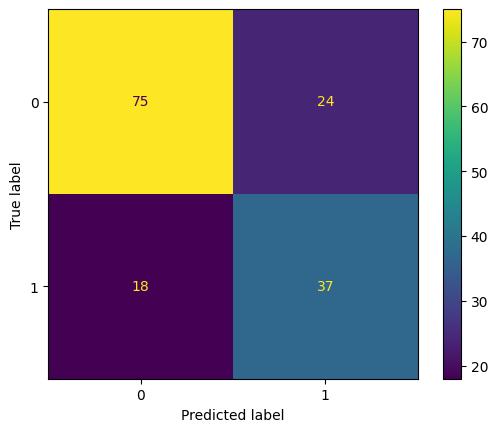

In [53]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Reflexión final sobre el modelo ganador

Aunque el modelo Gradient Boosting con hiperparámetros optimizados fue el mejor en validación cruzada, su rendimiento final sobre el conjunto de test no mejora respecto al modelo base (regresión logística):

- El número de falsos negativos (personas con diabetes no detectadas) se mantiene en 18.
- Las métricas de precisión, recall y f1-score para la clase 1 son prácticamente idénticas.
- El accuracy global incluso disminuye ligeramente (0.73 vs. 0.76).

Esta situación puede deberse a:
- El pequeño tamaño del conjunto de test.
- La limitada capacidad predictiva del dataset.
- La similitud entre las representaciones aprendidas por modelos lineales y de árbol en este caso concreto.

**Decisión**: mantengo Gradient Boosting como modelo final según el procedimiento exigido por el enunciado, pero reconozco que no mejora sustancialmente frente al baseline.
